## Importing Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
ads = pd.read_csv('advertising.csv')
df = ads.copy()
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Explore Data Analysis

In [3]:
import eda

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.isnull().sum()

daily time spent on site    0
age                         0
area income                 0
daily internet usage        0
ad topic line               0
city                        0
male                        0
country                     0
timestamp                   0
clicked on ad               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area income               1000 non-null   float64
 3   daily internet usage      1000 non-null   float64
 4   ad topic line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked on ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df.describe([0]).T

,count,mean,std,min,0%,50%,max
daily time spent on site,1000.0,65.00020,15.853615,32.60,32.60,68.215,91.43
age,1000.0,36.00900,8.785562,19.00,19.00,35.000,61.00
area income,1000.0,55000.00008,13414.634022,13996.50,13996.50,57012.300,79484.80
daily internet usage,1000.0,180.00010,43.902339,104.78,104.78,183.130,269.96
male,1000.0,0.48100,0.499889,0.00,0.00,0.000,1.00
clicked on ad,1000.0,0.50000,0.500250,0.00,0.00,0.500,1.00


In [9]:
df.corr()['clicked on ad'].sort_values(ascending=False)

clicked on ad               1.000000
age                         0.492531
male                       -0.038027
area income                -0.476255
daily time spent on site   -0.748117
daily internet usage       -0.786539
Name: clicked on ad, dtype: float64

In [10]:
df['ad topic line'].nunique()

1000

In [11]:
df.country.nunique()

237

In [12]:
df.city.nunique()

969

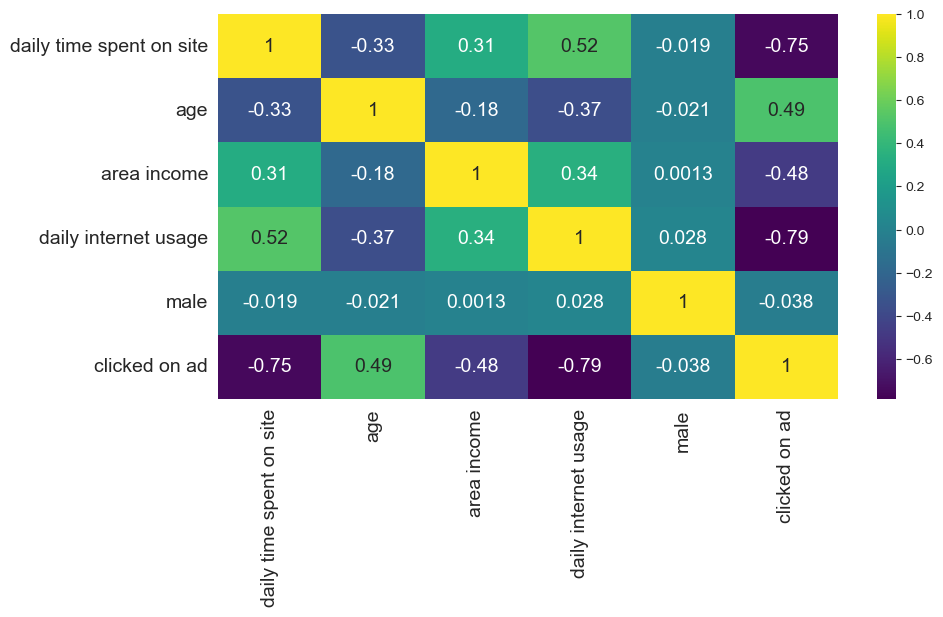

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True,annot_kws={'size':14},cmap = 'viridis')
plt.xticks(size = 14,rotation = 'vertical')
plt.yticks(size = 14)
plt.show()

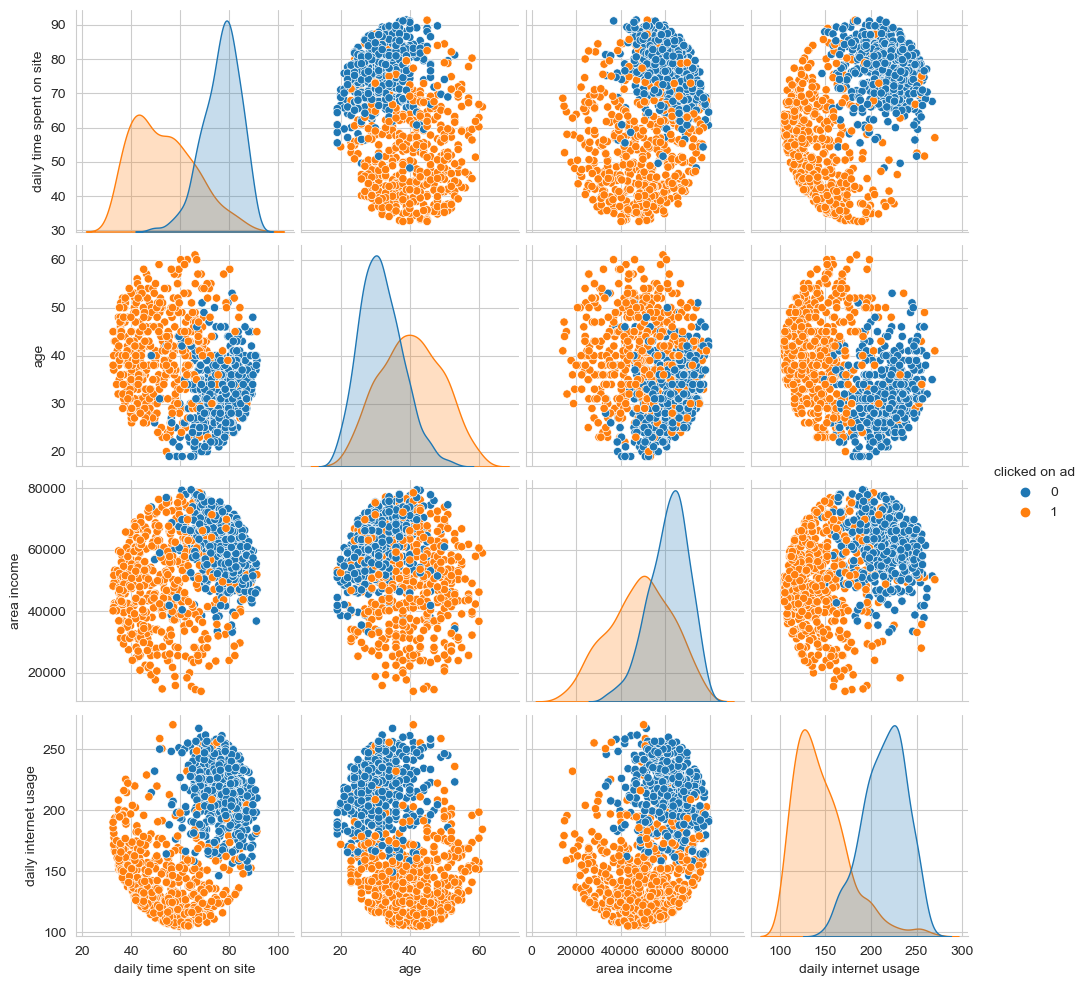

In [14]:
sns.pairplot(data = df.drop('male',axis = 1),hue= 'clicked on ad')
plt.show()

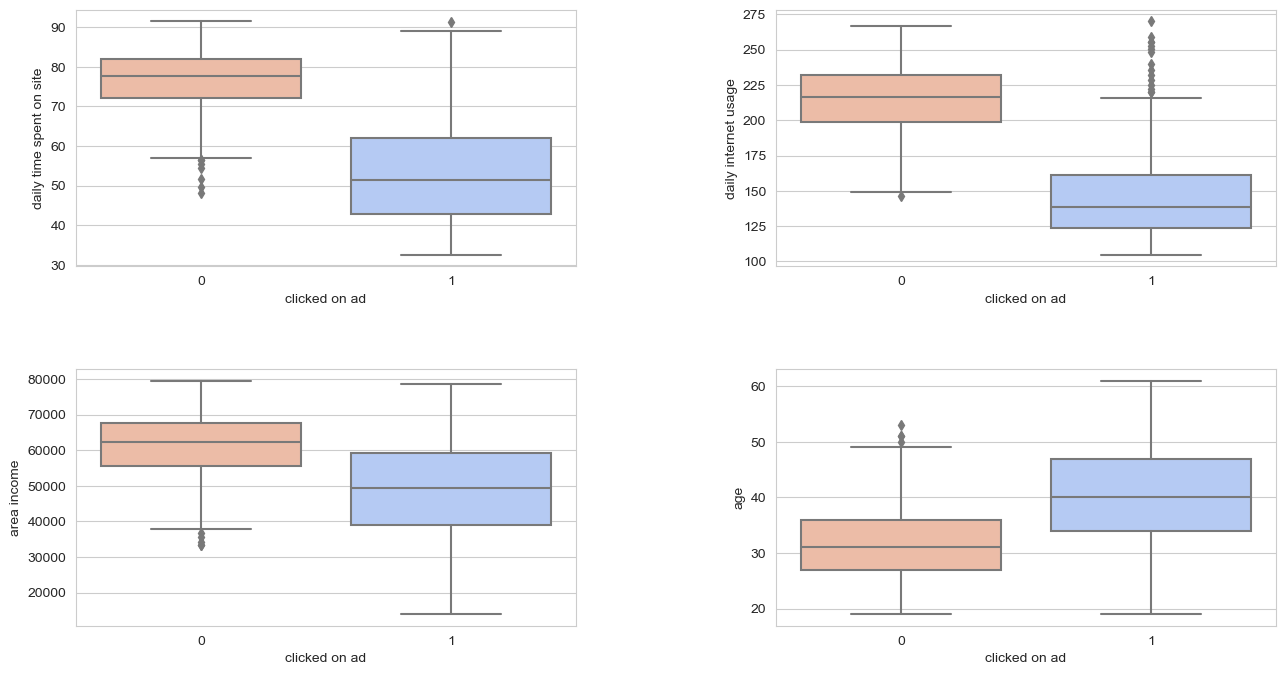

In [15]:
eda.boxPlot(df)

In [16]:
eda.cal(df)

_______________Clicked on Ad Rates________________


daily time spent on site <= mean - std: 99.54%
daily time spent on site <= mean: 93.06%
daily time spent on site >= mean: 17.25%
daily time spent on site >= mean + std: 7.47%


daily internet usage <= mean - std: 100.0%
daily internet usage <= mean: 90.78%
daily internet usage >= mean: 11.13%
daily internet usage >= mean + std: 5.77%


area income <= mean - std: 92.73%
area income <= mean: 74.15%
area income >= mean: 30.95%
area income >= mean + std: 27.21%


age <= mean - std: 21.43%
age <= mean: 30.94%
age >= mean: 75.47%
age >= mean + std: 90.91%


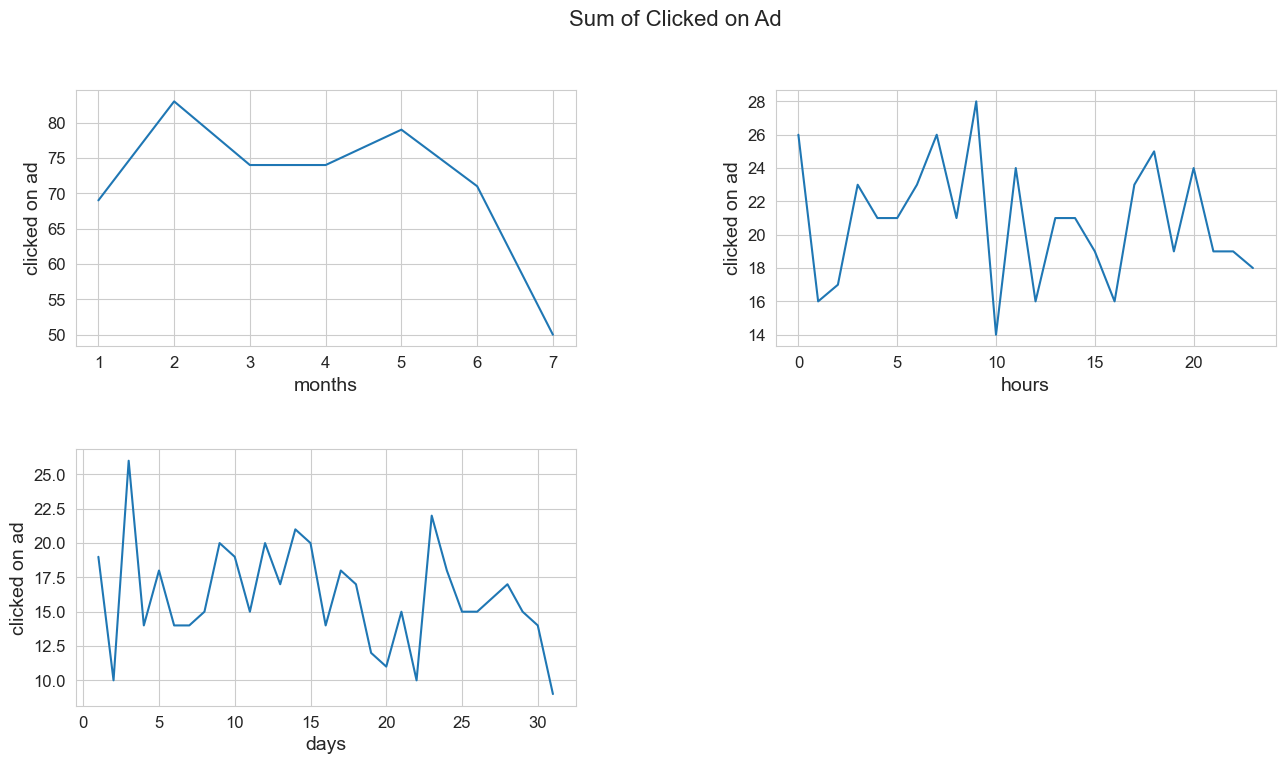

In [17]:
eda.linePlot(df)

In [18]:
pv_timestamp = df.pivot_table(values='clicked on ad', index=['days','hours'],columns='months', aggfunc='sum').fillna(0)
pv_timestamp.to_excel('timestamp.xlsx')
pv_timestamp

months        1    2    3    4    5    6    7
days hours                                   
1    0      0.0  1.0  0.0  0.0  1.0  0.0  0.0
     1      0.0  0.0  0.0  1.0  0.0  0.0  1.0
     2      0.0  0.0  0.0  0.0  0.0  0.0  0.0
     3      0.0  0.0  0.0  0.0  0.0  2.0  0.0
     4      0.0  0.0  0.0  0.0  0.0  0.0  0.0
...         ...  ...  ...  ...  ...  ...  ...
31   13     0.0  0.0  0.0  0.0  0.0  0.0  0.0
     17     0.0  0.0  0.0  0.0  1.0  0.0  0.0
     20     0.0  0.0  0.0  0.0  0.0  0.0  0.0
     21     0.0  0.0  0.0  0.0  1.0  0.0  0.0
     23     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[554 rows x 7 columns]

## Data Preprocessing

### Create Independent and Dependent variables

In [19]:
X = df.drop(['timestamp','clicked on ad','city','country','ad topic line','months','days','hours'],axis = 1).values
y = df['clicked on ad'].values

### Split the data into the train set and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

### Scale the Variables

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create Machine Learning Model

### Libraries

In [22]:
import ml

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score,GridSearchCV

### Random Forest

In [25]:
def random_forest():
    classifier = RandomForestClassifier(criterion='entropy',n_estimators = 100,random_state=0).fit(X_train,y_train)
    return classifier

### Decision Tree

In [26]:
def decision_tree():
    classifier = DecisionTreeClassifier(
        criterion='gini',
        max_depth = 4,
        min_samples_split = 4,
        random_state=0
    ).fit(X_train,y_train)
    return classifier

### K Nearest Neighbors

In [27]:
def knn():
    classifier = KNeighborsClassifier(n_neighbors=19).fit(X_train,y_train)
    return classifier

### Naive Bayes

In [28]:
def naive_bayes():
    classifier = GaussianNB().fit(X_train,y_train)
    return classifier

### MLP

In [29]:
def mlp():
    classifier = MLPClassifier(
        early_stopping=True,
        batch_size=32,
        random_state=0
    ).fit(X_train,y_train)
    
    return classifier

### Logistic Regression

In [30]:
def logistic_reg():
    classifier = LogisticRegression(random_state=0,C=1).fit(X_train,y_train)
    return classifier

### XGBoost

In [31]:
def xgboost():
    classifier = XGBClassifier(learning_rate =  0.1, 
                               max_depth = 4, 
                               n_estimators = 100,
                               subsample = 0.8
                              ).fit(X_train,y_train)
    return classifier

### LightGBM

In [32]:
def lgbm():
    classifier = LGBMClassifier(
        learning_rate = 0.1,
        max_depth = 6,
        n_estimators = 100,
        subsample=0.6
    ).fit(X_train,y_train)
    
    return classifier

## Classifiers

In [33]:
classifiers = {'Random Forest':random_forest(),'Decision Tree':decision_tree(),'KNN':knn(),
             'Naive Bayes':naive_bayes(),'MLP':mlp(),'Logistic Regression':logistic_reg(),
               'XGBoost':xgboost(),'lgbm':lgbm()}

## GridSearch

In [34]:
parameters = {
    'Random Forest': {"max_depth": [None,5,8,10],"n_estimators": [100,500,1000], 'criterion':['entropy','gini']},
    'Decision Tree': {'criterion': ['entropy','gini'], "max_depth": range(1,10), "min_samples_split" : list(range(2,50))},
    'KNN': {'n_neighbors': np.arange(1,20,step = 2)},
    'Logistic Regression': {'C':[1.0,2.0,3.0,4.0,5.0]},
    'XGBoost': {'n_estimators': [100, 500, 1000],'subsample': [0.6, 0.8, 1.0],'max_depth': [4, 5, 6],'learning_rate': [0.1, 0.01, 0.02]},
    'lgbm': {'n_estimators': [100, 500, 1000],'subsample': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5,6],'learning_rate': [0.1,0.01,0.02]}
}

In [35]:
print('This operation might be take a few minutes!\n')
for p in parameters:
    ml.grid_search(
        parameters = parameters[p],
        classifier = classifiers[p],
        algorithmName = p,
        X_train = X_train,
        y_train = y_train
    )

This operation might be take a few minutes!

__________________Random Forest___________________
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 1000}


__________________Decision Tree___________________
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


_______________________KNN________________________
Best Parameters: {'n_neighbors': 19}


_______________Logistic Regression________________
Best Parameters: {'C': 1.0}


_____________________XGBoost______________________
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


_______________________lgbm_______________________
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}




## Result

In [36]:
df_result = pd.DataFrame()
index = 1

for c in classifiers:
    df_result,index = ml.calculate_scores(classifiers[c],c,df_result,index,X_train,y_train,X_test,y_test)

In [37]:
df_result.sort_values(by = 'Accuracy',ascending=False)

,Algorithm,Accuracy,Precision,Recall,cvs mean,cvs std (%),TP,TN,FP,FN
6,Logistic Regression,0.964,0.976,0.954,0.975,1.543,124,117,3,6
4,Naive Bayes,0.952,0.954,0.954,0.969,2.091,124,114,6,6
7,XGBoost,0.948,0.947,0.954,0.961,1.655,124,113,7,6
3,KNN,0.944,0.983,0.908,0.969,2.294,118,118,2,12
1,Random Forest,0.940,0.939,0.946,0.965,2.083,123,112,8,7
2,Decision Tree,0.940,0.953,0.931,0.964,2.215,121,114,6,9
5,MLP,0.940,0.983,0.900,0.957,2.255,117,118,2,13
8,lgbm,0.940,0.946,0.938,0.965,1.600,122,113,7,8


## Predict a Single Value

In [38]:
# df.describe().transpose()

In [39]:
# predictions = [[enter_values_of_each_column]]
# predictions = sc.transform(predictions)

# print(classifiers['enter_algorithm_name'].predict(predictions)[0])

## Save / Load Machine Learning Model

### Save

In [40]:
# import pickle
# try:
#     with open('your_file_name', 'wb') as file:  
#         pickle.dump(classifiers['enter_algorithm_name'], file)
#     print('Model Saved')
# except:
#     print('Invalid Algorithm Name!')

### Load

In [41]:
# import pickle
# try:
#     with open('your_file_name', 'rb') as file:  
#         my_model = pickle.load(file)
#     print('Model Loaded')
# except:
#     print('Invalid Filename!')